<p><img alt="Colaboratory logo" height="150px" src="https://blog-static.infra.grancursosonline.com.br/wp-content/uploads/2015/09/03174643/UFC2.png" align="right" hspace="30px" vspace="0px"></p>  

<h1>
<strong> Universidade Federal do Ceará </strong>  <br>
Bacheralado em Matemática Industrial  <br>
Prova - 22/ 10/2020  <br>
Disciplina: CC0218 - FUNDAMENTOS DE ESTATÍSTICA  <br>
Professor: Luis Gustavo  <br>
Membros: Daniel Nunes, Paulino Rabelo <br>
</h1>


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/50_SupermarketBranches.csv')
df = df[['State', 'Profit']]
df = df[df['State'].isin(["New York", "California"])]

<h2> <strong> a. Quais as médias e desvios-padrão amostrais para os grupos de supermercados de Nova Iorque e Califórnia? </strong> </h2>



In [5]:
df.groupby('State')['Profit'].describe()[['mean', 'std']].rename( columns = {'mean': 'Média', 'std': 'Desvio Padrão' } ).round(3)

,Média,Desvio Padrão
State,,
California,103905.175,44446.359
New York,113756.446,41140.258


<h2> <strong> b. Obtenha um histograma para os dois grupos. Quais as semelhanças e diferenças entre eles? </strong> </h2>


Os dois histograma tem uma certa assimetria e normalidade, mas visualmente o histograma de Nova York é mais ass

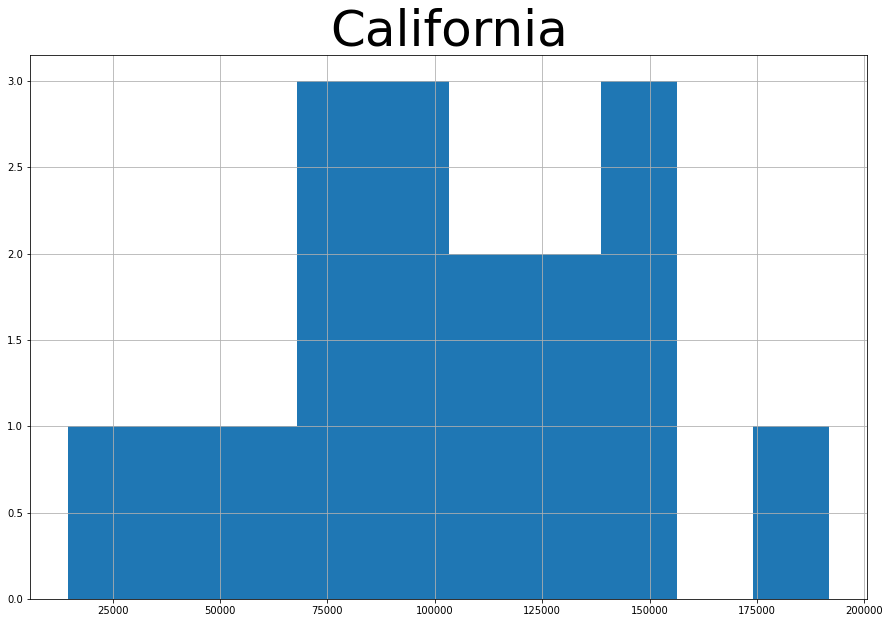

In [6]:
plt.title('California', fontsize=50)
df[df['State'] == 'California']['Profit'].hist(figsize=(15, 10));

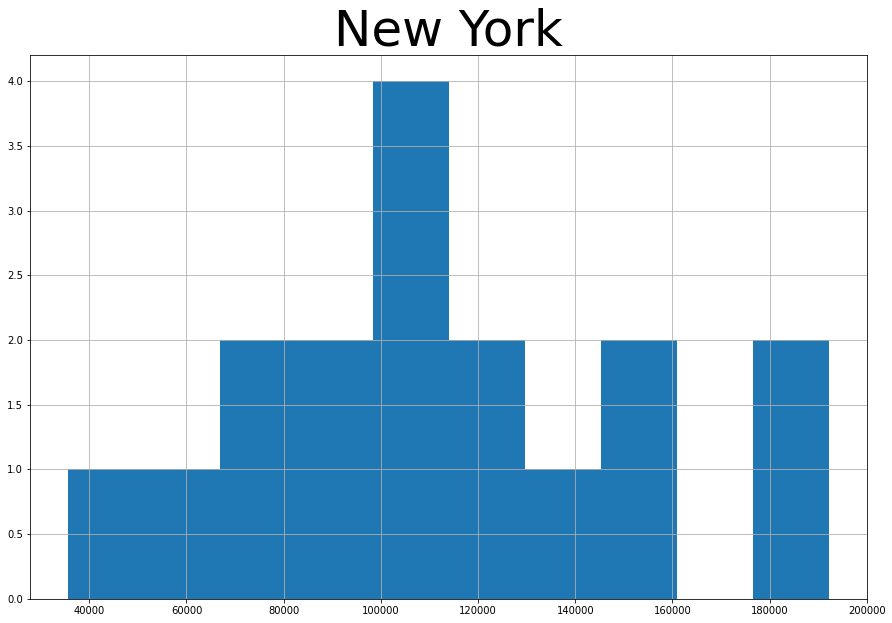

In [ ]:
plt.title('New York', fontsize=50)
df[df['State'] == 'New York']['Profit'].hist(figsize=(15, 10));

<h2> <strong> c. Obtenha um boxplot para os dois grupos. Quais as semelhanças e diferenças entre eles?
 </strong> </h2>

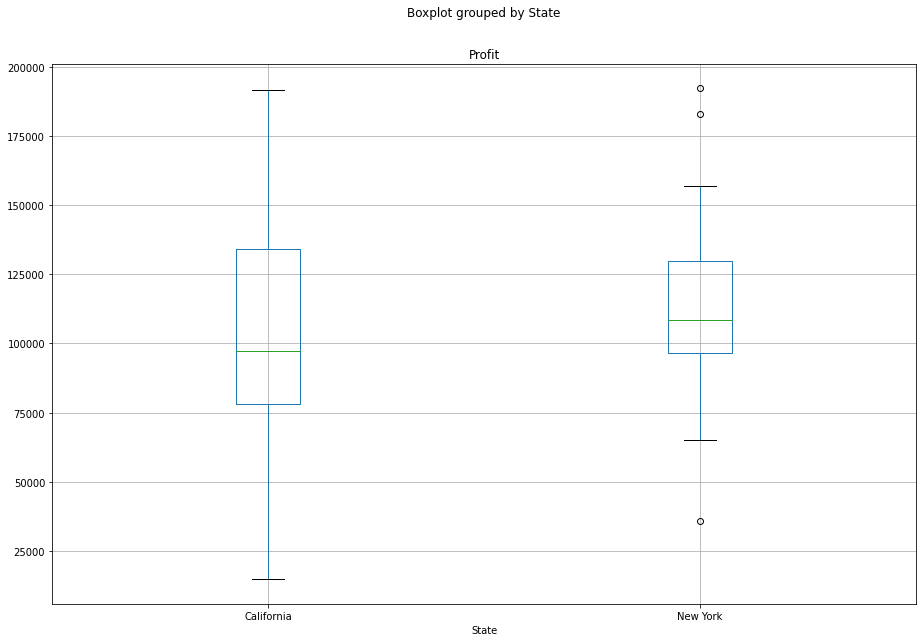

In [7]:
df.boxplot('Profit', 'State', figsize=(15, 10));

<h2> <strong> d. Qual dos dois grupos apresenta um valor mediano de vendas maior? Qual dos dois apresenta maior
variabilidade?
 </strong> </h2>

In [8]:
df.groupby('State')['Profit'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
California,17.0,103905.18,44446.36,14681.40,78239.91,97427.84,134307.35,191792.06
New York,17.0,113756.45,41140.26,35673.41,96479.51,108552.04,129917.04,192261.83


<h2> <strong>  e. Baseado no que foi observado nos itens anteriores, qual região parece apresentar maiores valores de
vendas anuais? Os histogramas dos dois grupos sugerem que a distribuição normal é adequada para
esses dados? Qual dos dois grupos, a um nível de significância de 5%, parece apresentar o maior
nível de vendas anual? 
 </strong> </h2>


<h2> <strong>  e.1. Baseado no que foi observado nos itens anteriores, qual região parece apresentar maiores valores de
vendas anuais?  
 </strong> </h2>

<h2> <strong>  e.2.Os histogramas dos dois grupos sugerem que a distribuição normal é adequada para
esses dados?
 </strong> </h2>

<h2> <strong> Base no teste de normalidade:
 </strong> </h2>

In [ ]:
from scipy.stats import normaltest

A função normaltest testa a hipótese nula **Ho** de que a amostra é proveniente de uma distribuição normal.

**Critério do valor p :**

   Rejeitar Ho se o valor p $\leq$ 0,05

In [9]:
from scipy.stats import normaltest
significancia = 0.05 
Estatistica_Teste, p_valor = normaltest(df[df['State'] == 'California']['Profit'])
print(Estatistica_Teste)
print(p_valor)

0.05958490625771693
0.9706469673853677


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [10]:
if p_valor <= significancia:
  print('Como o p_valor é menor que 0,05, então Rejeitamos H0')
else:
  print('Como o p_valor não é menor que 0,05, então não Rejeitamos H0, isso quer dizer que: o lucro anual do grupo da California segue uma Normal')

Como o p_valor não é menor que 0,05, então não Rejeitamos H0, isso quer dizer que: o lucro anual do grupo da California segue uma Normal


In [29]:
Estatistica_Teste, p_valor = normaltest(df[df['State'] == 'New York']['Profit'])
print(Estatistica_Teste)
print(p_valor)

0.25531244944036724
0.8801559029833859


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [12]:
if p_valor <= significancia:
  print('Como o p_valor é menor que 0,05, então Rejeitamos H0')
else:
  print('Como o p_valor não é menor que 0,05, então não Rejeitamos H0, isso quer dizer que: o lucro anual do grupo da New York segue uma Normal.')

Como o p_valor não é menor que 0,05, então não Rejeitamos H0, isso quer dizer que: o lucro anual do grupo da New York segue uma Normal.


<h2> <strong>  e.3. Qual dos dois grupos, a um nível de significância de 5%, parece apresentar o maior
nível de vendas anual? 
 </strong> </h2>

In [15]:
std_NY = df[df['State'] == 'New York']['Profit'].describe()[['std']]
std_C = df[df['State'] == 'California']['Profit'].describe()[['std']]
M_NY = df[df['State'] == 'New York']['Profit'].describe()[['mean']]
M_C = df[df['State'] == 'California']['Profit'].describe()[['mean']]
N2_NY = df[df['State'] == 'New York']['Profit'].describe()[['count']]
N1_C = df[df['State'] == 'California']['Profit'].describe()[['count']]
se1, se2 = std_C/math.sqrt(N1_C), std_NY/math.sqrt(N2_NY)
B_c = df[df['State'] == 'California']['Profit'].tolist()
B_y = df[df['State'] == 'New York']['Profit'].tolist()

In [25]:
def independent_ttest(B_c,B_y , alpha):
    M_C = df[df['State'] == 'California']['Profit'].describe()[['mean']]
    M_NY = df[df['State'] == 'New York']['Profit'].describe()[['mean']]
    std_C = df[df['State'] == 'California']['Profit'].describe()[['std']]
    std_NY = df[df['State'] == 'New York']['Profit'].describe()[['std']]
    N1_C = df[df['State'] == 'California']['Profit'].describe()[['count']]
    N2_NY = df[df['State'] == 'New York']['Profit'].describe()[['count']]
    se1, se2 = std_C/math.sqrt(N1_C), std_NY/math.sqrt(N2_NY)
    sed = math.sqrt(se1**2.0 + se2**2.0)
    t_stat = (M_C - M_NY)/sed
    gl = N1_C + N2_NY - 2
    cv = scipy.stats.t.ppf(1.0 - alpha, gl)
    p = (1 - scipy.stats.t.cdf(abs(t_stat), gl)) * 2
    return t_stat, gl, cv, p
  
alpha = 0.05
t_stat, gl, cv, p = independent_ttest(B_c,B_y, alpha)

print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, gl, cv, p))


if t_stat[0] <= cv[0]:
    print('Aceite a hipótese nula de que as médias são iguais.')
else:
    print('Rejeite a hipótese nula de que as médias são iguais.')

if p[0] > alpha:
	print('Comparando P-valor temos: Aceite a hipótese nula de que as médias são iguais.')
else:
	print('Comparando P-valor temos: Rejeite a hipótese nula de que as médias são iguais.')

t=-0.671, df=32, cv=1.694, p=0.507
Aceite a hipótese nula de que as médias são iguais.
Comparando P-valor temos: Aceite a hipótese nula de que as médias são iguais.
